# jointplot

#### seaborn.jointplot(x, y, data=None, kind='scatter', stat_func = function pearsonr, color=None, size=6, ratio=5, space=0.2,  dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs
https://seaborn.github.io/generated/seaborn.jointplot.html

### Draw a scatterplot with marginal histograms:

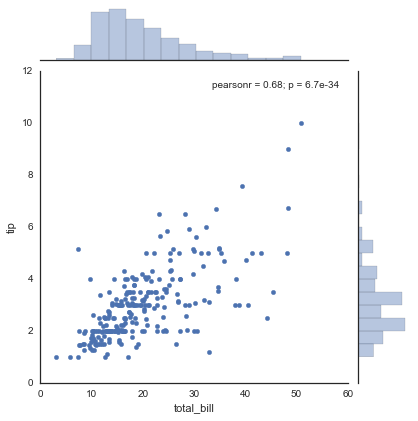

In [4]:
import numpy as np, pandas as pd
np.random.seed(0)
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

### Add regression and kernel density fits:

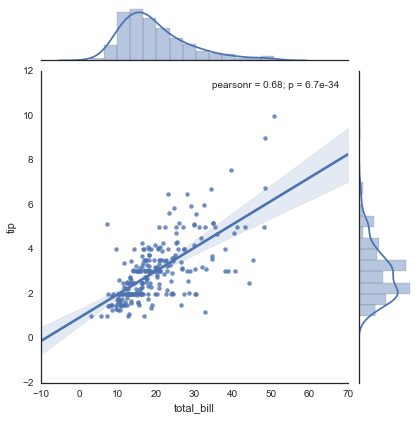

In [5]:
 g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")

### Draw a smaller figure with more space devoted to the marginal plots:

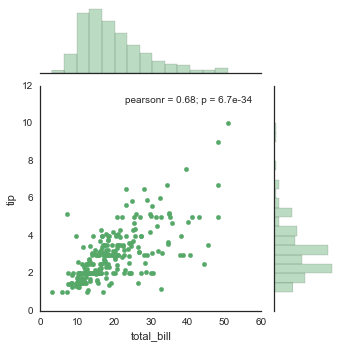

In [8]:
g = sns.jointplot("total_bill", "tip", data=tips,
               size=5, ratio=3, color="g")

# pairplot
https://seaborn.github.io/generated/seaborn.pairplot.html
## pairgrid
https://seaborn.github.io/generated/seaborn.PairGrid.html

### Visualizing pairwise relationships in a dataset

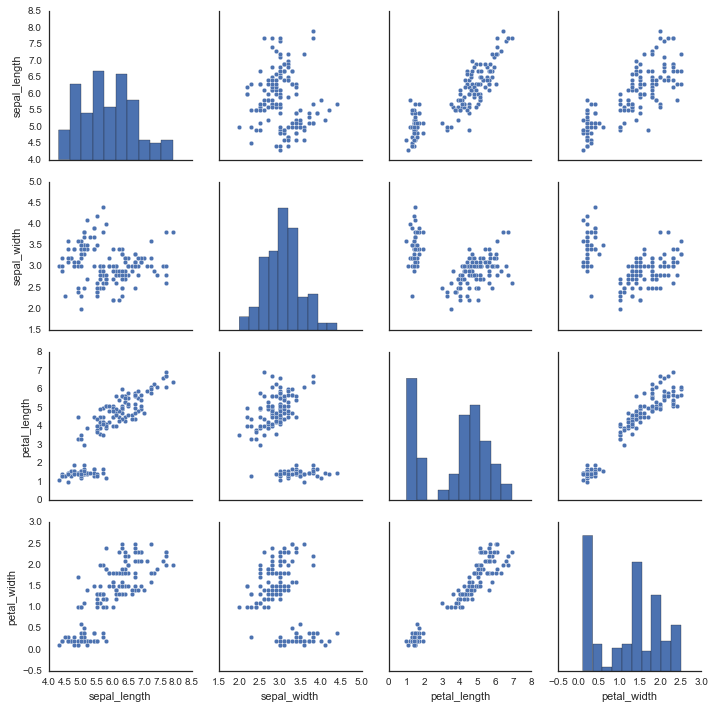

In [9]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

## Color the points using a categorical variable:

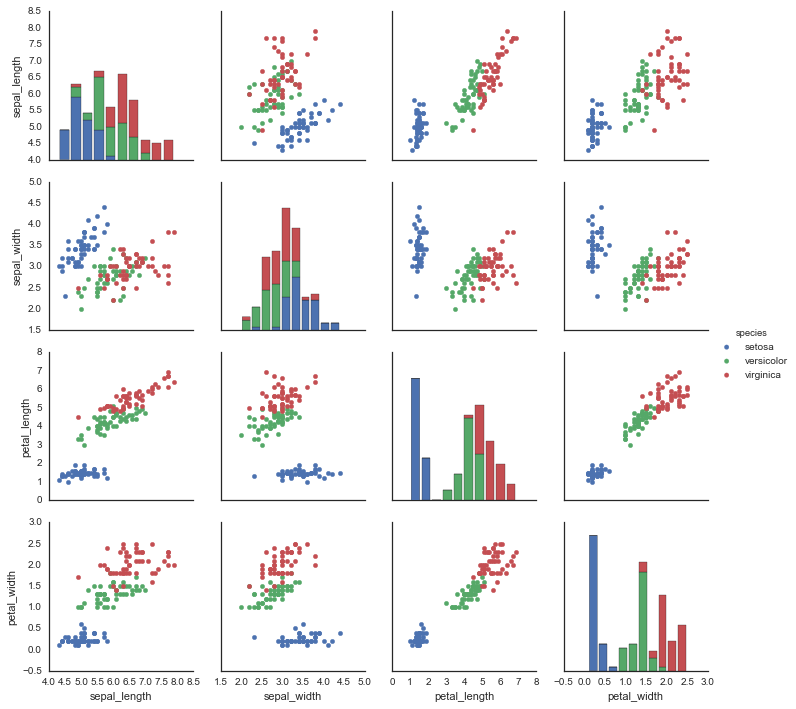

In [10]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

## Plot a subset of variables

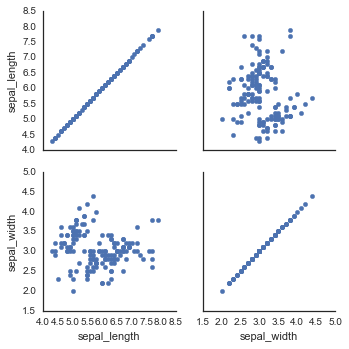

In [11]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"])
g = g.map(plt.scatter)

### Use different colors and markers for each categorical level:

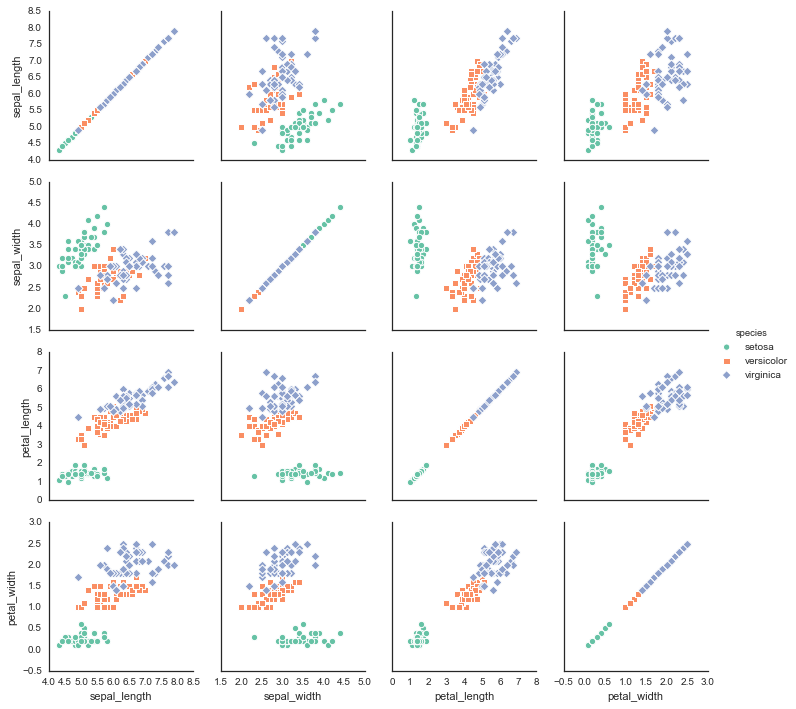

In [12]:
g = sns.PairGrid(iris, hue="species", palette="Set2",
                  hue_kws={"marker": ["o", "s", "D"]})
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

# Functions to draw linear regression models
#### Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.
#### In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

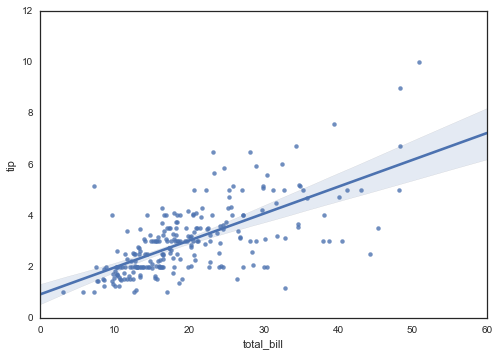

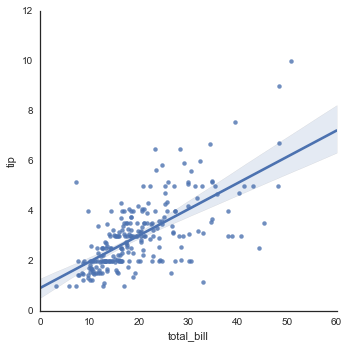

In [69]:
fig = plt.figure()
#fig.add_subplot(211)

sns.regplot(x="total_bill", y="tip", data=tips)
#addsubplot(1)
#fig
sns.lmplot(x="total_bill", y="tip", data=tips)


# lmplot

There are a number of mutually exclusive options for estimating the regression model: order, logistic, lowess, robust, and logx. See the parameter docs for more information on these options.
#### seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)

https://seaborn.github.io/generated/seaborn.lmplot.html

# Fitting different kinds of models
#### The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets
https://seaborn.github.io/tutorial/regression.html


   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

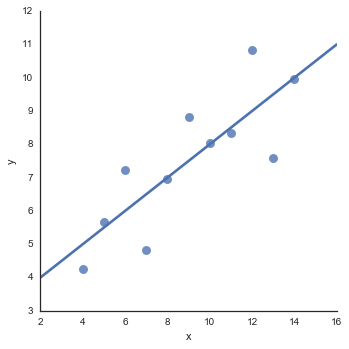

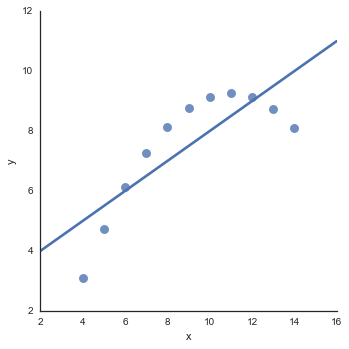

In [76]:
anscombe = sns.load_dataset("anscombe")
print anscombe
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

# The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

#### In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:


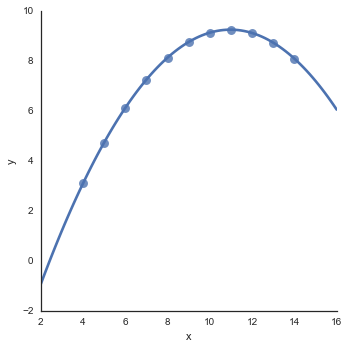

In [61]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

#### A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

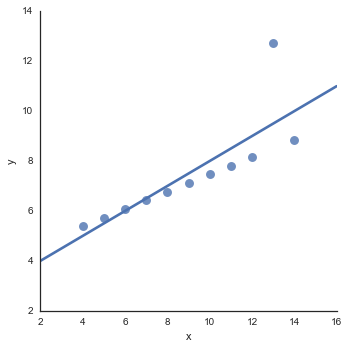

In [62]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

#### In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

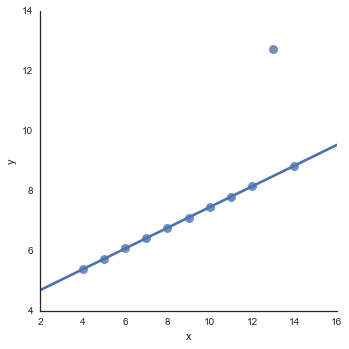

In [63]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

#### An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

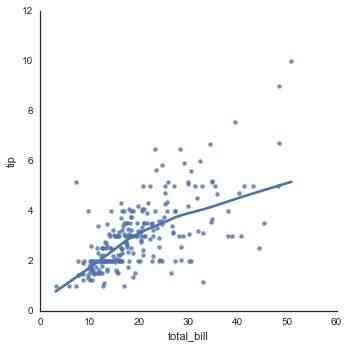

In [65]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

### The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

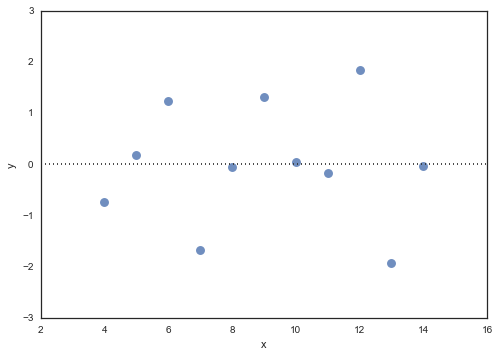

In [59]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

### If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

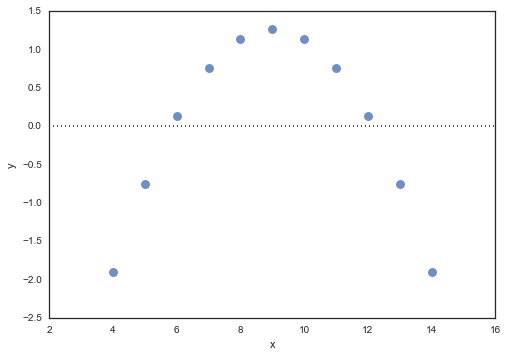

In [66]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});